# Run a simple fft for A4
## The first time takes a while to do all the imports, so the GUI will be a little slow to show
If you wish to use it for other pitches, change the xlims in line 104 to suit

[4773 4782 4785 4787 4790 4792 4794 9545 9550 9555 9559 9562 9566 9569
 9572 9574 9576 9584 9586 9588]
4773
[ True  True  True  True  True  True  True False False False False False
 False False False False False False False False]
[4773 4782 4785 4787 4790 4792 4794]
[0.69529125 0.52048838 0.61095075 0.34236181 0.36716913 0.36919481
 0.26589314]
0.6952912539785107
[ True False False False False False False]
[4773]
436.98
[436.98] [0.69529125]


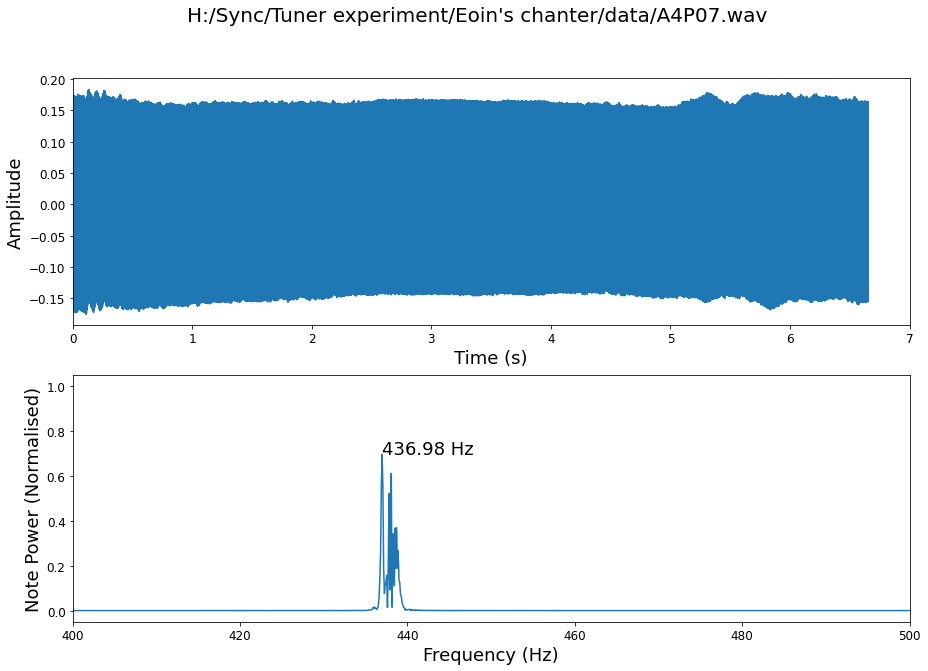

In [6]:
#import capabilities
import tkinter # for file explorer GUI window
from tkinter import filedialog #specify the filedialog
import librosa # audio analytical library
import matplotlib.pyplot as plt # to deal with the graphs
import math #to deal with some of the maths
import numpy as np # to deal with the vectors
from scipy.signal import find_peaks #to identify peaks

#set up the GUI to select a file

root = tkinter.Tk() #use the tkinter library
root.wm_withdraw() # this completely hides the root window

#let's go get the file

def process_file():
    filename = filedialog.askopenfilename() # open the dialog to get the file
    root.destroy() #when file is selected, kill the dialog
    y, sr = librosa.load(filename, sr=None) # y takes the data points; sr is the sampling frequency;
                                            # setting sr to "None" forces it to accept the original, 
                                            #rather than resampling
    
  
    
    m = len(y)
        
    next_power_2 = math.ceil(math.log2(abs(m))) #find and round up to an integer the log(to the base 2), of the 
                                                #absolute value of m 
    n = int(math.pow(2,next_power_2)) #get ready to pad out the data with zeros, for faster processing;
    k = int(n/2) # n and k both need to be integers to be used in python indexes later
  
    
    Y = np.fft.fft(y, n) #run the fast fourier transform out to a count of n
    f = np.linspace(0,k,k)*(sr/n) #calulate the frequency bins for the x-axis, only as far as n/2
   
    
    k = int(np.floor(len(Y)/2)) #recalculate k from the transformed data
  
    power1 = abs(Y)**2/n #calculate the square of the absolute value of Y per frequency bin
    plot_power = power1[:k] # take the first half of the data; the second half is a mirror of the first half
    
    #normalise the data to display between 0 and 1
    norm_power = (plot_power - np.min(plot_power))/ (np.max(plot_power)-np.min(plot_power))

    #the fundamental is frequently not the maximum peak in the spectrum.
    #hunt down the peaks that are greater than 0.25
    peaks, _ = find_peaks(norm_power, height=0.250) #remember that this returns the indices, not the values
    
    print(peaks) #you will find the indices of a range of peaks, more than one of which refer to the fundamental;
                    #there is a spread of peaks around the fundamental: call them "relevant" peaks
                    #we need to find the highest of the relevant peaks
    
    first_peak = peaks[0] #the earliest relevant peak
    print(first_peak)
    relevant_peaks = peaks <= first_peak + 100 # assume that all relevant peaks will occur within 100 data points
                                                #i.e. at an index < 100+the index of the first peak
                                                #returns either TRUE or FALSE; we are only interested in TRUE
    print(relevant_peaks)
    
    power_peaks = peaks[relevant_peaks]
    print(power_peaks)
    relevant_powers = norm_power[power_peaks]
    print(relevant_powers)
    max_relevant_power = np.max(relevant_powers)
    print(max_relevant_power)
    my_peak_idx = relevant_powers == max_relevant_power #find the index of the maximum relevant power
    print(my_peak_idx)
    my_peak = power_peaks[my_peak_idx]
    print(my_peak)
    fund = np.round(f[my_peak],2) #use the idex to identify the fundamental of maximum power within the relevant group
    print(str(fund[0]))
    fund_text = str(fund[0]) + " Hz"
    note_height = norm_power[my_peak]
    print(fund,note_height)
    
    
    
    timestep = 1/sr

    end_time = len(y)/sr
    time = np.arange(0,len(y)*timestep,timestep)
    max_time = math.ceil(end_time)
    
    plt.rc('xtick',labelsize=12) #set global tick label size
    plt.rc('ytick',labelsize=12)
    
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.suptitle(filename,fontsize = 20)
    
    fig.set_size_inches(15, 10)
    ax1.plot(time,y)
    ax1.set_ylabel('Amplitude', fontsize = 18)
    ax1.set_xlabel('Time (s)', fontsize = 18)
    ax1.set_xlim(0, max_time)

   
    
    
    
    ax2.plot(f,norm_power)
    ax2.set_ylabel('Note Power (Normalised)',fontsize = 18)
    ax2.set_xlabel('Frequency (Hz)',fontsize = 18)
    ax2.set_xlim(400,500) #change these to suit your own file
    ax2.text(fund,note_height,fund_text,fontsize = 18)


process_file()  #run the application

root.mainloop() #finish the tkinter loop


